In [1]:
from pymongo import MongoClient
client = MongoClient()
db = client.freeleads

In [2]:
import nltk, re
def tokenize(tweet):
    text = tweet.get("extended_tweet", {}).get("full_text") or tweet.get("text")
    text = re.sub(r"http\S+", "", text)
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text.lower())
    user = tweet.get("user", {}).get("name", "")
    return user, text


In [ ]:
# Premièrement, on récupère la fréquence totale de chaque mot sur tout le corpus d'artistes
freq_totale = nltk.Counter()
for k, v in corpora.iteritems():
    freq_totale += freq[k]

# Deuxièmement on décide manière un peu arbitraire du nombre de mots les plus fréquents à supprimer. On pourrait afficher un graphe d'évolution du nombre de mots pour se rendre compte et avoir une meilleure heuristique. 
most_freq = zip(*freq2.most_common(100))[0]

# On créé notre set de stopwords final qui cumule ainsi les 100 mots les plus fréquents du corpus ainsi que l'ensemble de stopwords par défaut présent dans la librairie NLTK
sw = set()
sw.update(stopwords)
sw.update(tuple(nltk.corpus.stopwords.words('french')))

196 leads
143 users


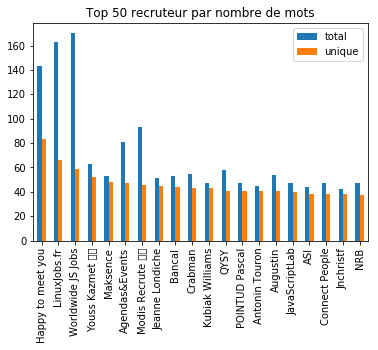

In [15]:
import pandas as pd
from collections import defaultdict

users = defaultdict(set)
print('{} leads'.format(db.lead.count_documents(filter={})))

def freq_stats_corpora():
    # Création d'un corpus de tokens par user
    corpora = defaultdict(list)

    for tweet in db.lead.find():
        user, text = tokenize(tweet)
        corpora[user] += [w for w in text if not w in list(sw)]

    stats, freq = dict(), dict()

    for k, v in corpora.items():
        freq[k] = fq = nltk.FreqDist(v)
        stats[k] = {'total': len(v), 'unique': len(fq.keys())} 
    return (freq, stats, corpora)

# Récupération des comptages
freq, stats, corpora = freq_stats_corpora()
df = pd.DataFrame.from_dict(stats, orient='index')

# Affichage des fréquences
df = df.sort_values(['unique'], ascending=False)
print('{} users'.format(len(df)))
df[:20].plot(kind='bar', title='Top 50 recruteur par nombre de mots')